<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,30.035941,74.826010,21.681241,44.220730,-0.012175,180.751747,180.790104,-0.038357
1,0.0,1.0,94.512861,93.122813,41.966630,37.232154,0.356376,277.190835,277.160974,0.029861
2,0.0,2.0,79.285699,40.724252,27.598777,79.341036,-0.320760,236.629003,237.176218,-0.547215
3,0.0,3.0,59.440586,73.982044,44.176997,39.150832,-0.135881,226.614578,226.793532,-0.178955
4,0.0,4.0,45.728781,92.189873,28.030735,61.735680,0.009594,237.694663,237.829179,-0.134516
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,37.743178,81.256350,33.398659,35.631835,0.045737,198.075758,197.750039,0.325719
29996,999.0,26.0,74.168700,62.953983,42.845727,53.604706,-0.059086,243.514030,243.665369,-0.151339
29997,999.0,27.0,99.965326,38.528210,40.233126,27.184511,0.011328,215.922501,216.104592,-0.182091
29998,999.0,28.0,77.690583,66.393883,30.667121,98.863188,-0.268511,283.346265,283.794383,-0.448118


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,30.035941,74.826010,21.681241,44.220730,-0.012175,180.751747,180.790104,-0.038357
1,0.0,1.0,94.512861,93.122813,41.966630,37.232154,0.356376,277.190835,277.160974,0.029861
2,0.0,2.0,79.285699,40.724252,27.598777,79.341036,-0.320760,236.629003,237.176218,-0.547215
3,0.0,3.0,59.440586,73.982044,44.176997,39.150832,-0.135881,226.614578,226.793532,-0.178955
4,0.0,4.0,45.728781,92.189873,28.030735,61.735680,0.009594,237.694663,237.829179,-0.134516
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,37.743178,81.256350,33.398659,35.631835,0.045737,198.075758,197.750039,0.325719
29996,999.0,26.0,74.168700,62.953983,42.845727,53.604706,-0.059086,243.514030,243.665369,-0.151339
29997,999.0,27.0,99.965326,38.528210,40.233126,27.184511,0.011328,215.922501,216.104592,-0.182091
29998,999.0,28.0,77.690583,66.393883,30.667121,98.863188,-0.268511,283.346265,283.794383,-0.448118


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    30.035941  74.826010  21.681241  44.220730 -0.012175  180.751747   
      1.0    94.512861  93.122813  41.966630  37.232154  0.356376  277.190835   
      2.0    79.285699  40.724252  27.598777  79.341036 -0.320760  236.629003   
      3.0    59.440586  73.982044  44.176997  39.150832 -0.135881  226.614578   
      4.0    45.728781  92.189873  28.030735  61.735680  0.009594  237.694663   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   37.743178  81.256350  33.398659  35.631835  0.045737  198.075758   
      26.0   74.168700  62.953983  42.845727  53.604706 -0.059086  243.514030   
      27.0   99.965326  38.528210  40.233126  27.184511  0.011328  215.922501   
      28.0   77.690583  66.393883  30.667121  98.863188 -0.268511  283.346265   
      29.0   99.620535  39.475555  48.725051  77.562975  0.272394  275.656509   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    180.790104 -0.038357  
      1.0    277.160974  0.029861  
      2.0    237.176218 -0.547215  
      3.0    226.793532 -0.178955  
      4.0    237.829179 -0.134516  
...                 ...       ...  
999.0 25.0   197.750039  0.325719  
      26.0   243.665369 -0.151339  
      27.0   216.104592 -0.182091  
      28.0   283.794383 -0.448118  
      29.0   275.761173 -0.104664  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    30.035941  74.826010  21.681241  44.220730 -0.012175  180.751747   
      1.0    94.512861  93.122813  41.966630  37.232154  0.356376  277.190835   
      2.0    79.285699  40.724252  27.598777  79.341036 -0.320760  236.629003   
      3.0    59.440586  73.982044  44.176997  39.150832 -0.135881  226.614578   
      4.0    45.728781  92.189873  28.030735  61.735680  0.009594  237.694663   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   37.743178  81.256350  33.398659  35.631835  0.045737  198.075758   
      26.0   74.168700  62.953983  42.845727  53.604706 -0.059086  243.514030   
      27.0   99.965326  38.528210  40.233126  27.184511  0.011328  215.922501   
      28.0   77.690583  66.393883  30.667121  98.863188 -0.268511  283.346265   
      29.0   99.620535  39.475555  48.725051  77.562975  0.272394  275.656509   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    180.790104 -0.038357  
      1.0    277.160974  0.029861  
      2.0    237.176218 -0.547215  
      3.0    226.793532 -0.178955  
      4.0    237.829179 -0.134516  
...                 ...       ...  
999.0 25.0   197.750039  0.325719  
      26.0   243.665369 -0.151339  
      27.0   216.104592 -0.182091  
      28.0   283.794383 -0.448118  
      29.0   275.761173 -0.104664  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,30.035941,74.826010,21.681241,44.220730,-0.012175,180.751747,180.790104,-0.038357
1,0.0,1.0,94.512861,93.122813,41.966630,37.232154,0.356376,277.190835,277.160974,0.029861
2,0.0,2.0,79.285699,40.724252,27.598777,79.341036,-0.320760,236.629003,237.176218,-0.547215
3,0.0,3.0,59.440586,73.982044,44.176997,39.150832,-0.135881,226.614578,226.793532,-0.178955
4,0.0,4.0,45.728781,92.189873,28.030735,61.735680,0.009594,237.694663,237.829179,-0.134516
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,37.743178,81.256350,33.398659,35.631835,0.045737,198.075758,197.750039,0.325719
29996,999.0,26.0,74.168700,62.953983,42.845727,53.604706,-0.059086,243.514030,243.665369,-0.151339
29997,999.0,27.0,99.965326,38.528210,40.233126,27.184511,0.011328,215.922501,216.104592,-0.182091
29998,999.0,28.0,77.690583,66.393883,30.667121,98.863188,-0.268511,283.346265,283.794383,-0.448118


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    30.035941  74.826010  21.681241  44.220730 -0.012175  180.751747   
      1.0    94.512861  93.122813  41.966630  37.232154  0.356376  277.190835   
      2.0    79.285699  40.724252  27.598777  79.341036 -0.320760  236.629003   
      3.0    59.440586  73.982044  44.176997  39.150832 -0.135881  226.614578   
      4.0    45.728781  92.189873  28.030735  61.735680  0.009594  237.694663   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   37.743178  81.256350  33.398659  35.631835  0.045737  198.075758   
      26.0   74.168700  62.953983  42.845727  53.604706 -0.059086  243.514030   
      27.0   99.965326  38.528210  40.233126  27.184511  0.011328  215.922501   
      28.0   77.690583  66.393883  30.667121  98.863188 -0.268511  283.346265   
      29.0   99.620535  39.475555  48.725051  77.562975  0.272394  275.656509   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    180.790104 -0.038357  
      1.0    277.160974  0.029861  
      2.0    237.176218 -0.547215  
      3.0    226.793532 -0.178955  
      4.0    237.829179 -0.134516  
...                 ...       ...  
999.0 25.0   197.750039  0.325719  
      26.0   243.665369 -0.151339  
      27.0   216.104592 -0.182091  
      28.0   283.794383 -0.448118  
      29.0   275.761173 -0.104664  

[30000 rows x 8 columns]

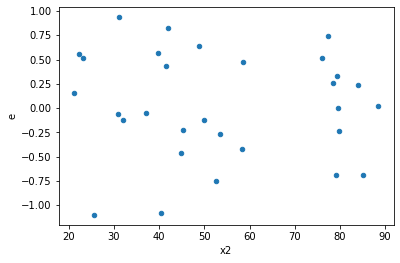

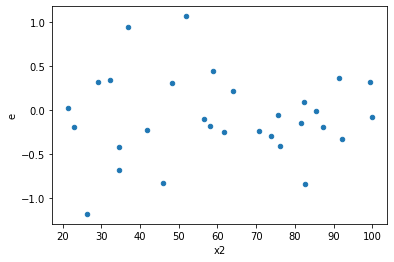

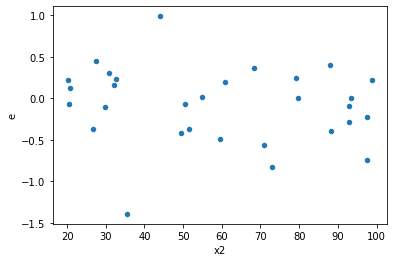

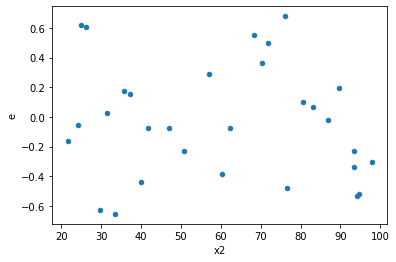

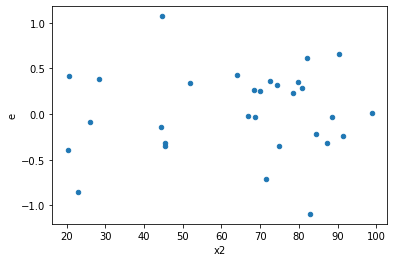

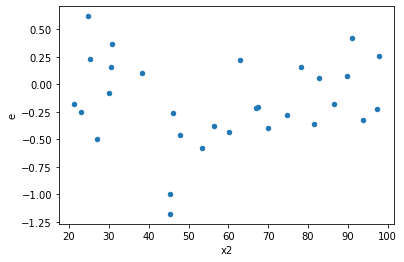

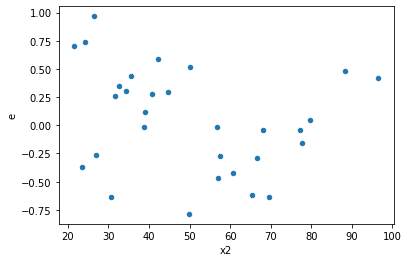

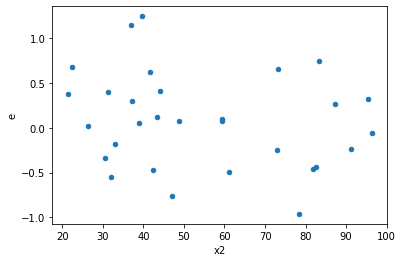

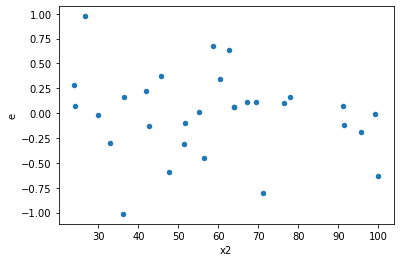

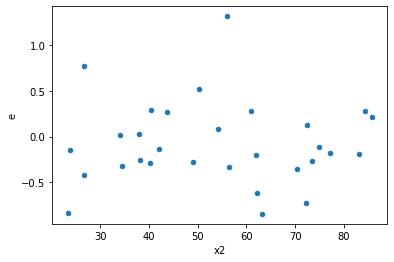

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,8.0,0.9674321052519858,1.2808707057051483,0.12092901315649822,0.16010883821314353,1.3239902818518945,0.7008962790874245,0.6495518604562878,0.35044813954371223,Reject005=1 : Homoscedasticity
1.0,8.0,8.0,0.4365378172734391,1.5656609440606681,0.05456722715917989,0.19570761800758352,3.5865413765056866,0.08951210639709473,0.9552439468014526,0.04475605319854736,Reject005=1 : Homoscedasticity
6.0,8.0,8.0,0.9983336291197447,1.1296709633816726,0.12479170363996808,0.14120887042270908,1.1315565562764136,0.8655037962794561,0.567248101860272,0.43275189813972803,Reject005=1 : Homoscedasticity
7.0,8.0,8.0,0.9648830990141922,1.1233442122360173,0.12061038737677403,0.14041802652950217,1.1642283022510422,0.834958306731924,0.582520846634038,0.417479153365962,Reject005=1 : Homoscedasticity
8.0,8.0,8.0,0.8394178439334251,2.35059545305254,0.10492723049167814,0.2938244316315675,2.800268626692391,0.16664561847410697,0.9166771907629465,0.08332280923705349,Reject005=1 : Homoscedasticity
9.0,8.0,8.0,0.7100904644743657,1.540091583698264,0.08876130805929572,0.192511447962283,2.1688667300134705,0.2942300807246665,0.8528849596376668,0.14711504036233325,Reject005=1 : Homoscedasticity
12.0,8.0,8.0,1.2904390370621999,2.1822240492306224,0.16130487963277498,0.2727780061538278,1.6910710126986324,0.4738498823500228,0.7630750588249886,0.2369249411750114,Reject005=1 : Homoscedasticity
13.0,8.0,8.0,0.5077076878650439,1.3494905529179515,0.06346346098313049,0.16868631911474394,2.6580069303119664,0.18831860779767728,0.9058406961011614,0.09415930389883864,Reject005=1 : Homoscedasticity
15.0,8.0,8.0,0.6704298366318947,0.8277657691855125,0.08380372957898684,0.10347072114818906,1.2346791922985438,0.7727922330882238,0.6136038834558881,0.3863961165441119,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,0.9674321052519858,1.2808707057051483,0.12092901315649822,0.16010883821314353,1.3239902818518945,0.7008962790874245,Reject005=1 : Homoscedasticity
1.0,8.0,8.0,0.4365378172734391,1.5656609440606681,0.05456722715917989,0.19570761800758352,3.5865413765056866,0.08951210639709473,Reject005=1 : Homoscedasticity
2.0,8.0,8.0,0.8506398582977241,0.7085680063009778,0.10632998228721552,0.08857100078762223,0.8329823713162743,0.8023260738161802,Reject005=1 : Homoscedasticity
3.0,8.0,8.0,1.5347545668597908,0.5304357676662952,0.19184432085747385,0.0663044709582869,0.34561602168847216,0.15409586302352007,Reject005=1 : Homoscedasticity
4.0,8.0,8.0,3.32783972163143,1.736587609376848,0.41597996520392877,0.217073451172106,0.5218363126351255,0.3766126138751811,Reject005=1 : Homoscedasticity
5.0,8.0,8.0,0.9820341891865281,0.9432200441840028,0.12275427364831601,0.11790250552300036,0.9604757701616509,0.9559167618617206,Reject005=1 : Homoscedasticity
6.0,8.0,8.0,0.9983336291197447,1.1296709633816726,0.12479170363996808,0.14120887042270908,1.1315565562764136,0.8655037962794561,Reject005=1 : Homoscedasticity
7.0,8.0,8.0,0.9648830990141922,1.1233442122360173,0.12061038737677403,0.14041802652950217,1.1642283022510422,0.834958306731924,Reject005=1 : Homoscedasticity
8.0,8.0,8.0,0.8394178439334251,2.35059545305254,0.10492723049167814,0.2938244316315675,2.800268626692391,0.16664561847410697,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      932
Reject005=0 : Heteroscedasticity     68
Name: Result_test, dtype: int64